In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [2]:
boston_df = pd.read_csv('boston_house_prices.csv')
boston_df.columns = boston_df.iloc[0]
boston_df = boston_df[1:].reset_index(drop=True)
boston_df = boston_df.apply(pd.to_numeric)

<Axes: ylabel='DIS'>

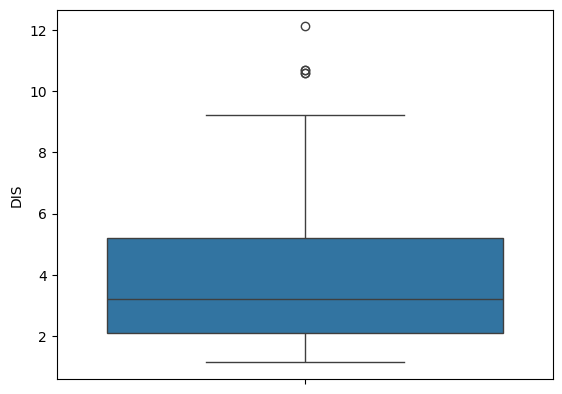

In [3]:
import seaborn as sns  # import thư viện seaborn để vẽ biểu đồ
sns.boxplot(boston_df['DIS'])  # vẽ box plot cho dữ liệu ở cột DIS

In [4]:
boston_df.columns = boston_df.iloc[0]
boston_df = boston_df[1:].reset_index(drop=True)
boston_df = boston_df.apply(pd.to_numeric)

In [8]:
boston_df[(boston_df['RM'] < lower) | (boston_df['RM'] > upper)]

KeyError: 'RM'

# Xác định giá trị ngoại lai bằng IQR

In [ ]:
# CRIM

In [9]:
# bước 1: tìm khoảng bình thường
Q3 = boston_df['CRIM'].quantile(0.75)
Q1 = boston_df['CRIM'].quantile(0.25)
IQR = Q3-Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR


KeyError: 'CRIM'

In [ ]:
# bước 2: tìm giá trị ngoài khoảng bình thường -> giá trị ngoại lai
boston_df[boston_df['CRIM'] < lower | boston_df['CRIM'] > upper][['CRIM']]

In [ ]:
# bô di -> mat dü liêu & nhüng dia diem có ty lê tôi pham cao & thânh phô boston -> .drop 
# tách dû liêu
    # df1: noi không bi outlier & crime -> ty le tôi pham nam trong nguöng binh thuòng -> loc df[diëu kiên]
    # df2: noi có outlier & crime -> ty lê tôi pham cao hán -> loc df[diêu kiên]

In [ ]:
# tim giá tri ngoai lai -> tung côt # nhin tûng côt -> phân tich ngoai lai ...
# không nên áp cho toàn bô bang
# chon côt minh quan tâm -> nho hon 15 côt

In [ ]:
# Ngoai lai (Outliers)

# Xác dinh có outlier không -> Vë xem có không? không 
# Có -> Tim ra giá tri no, ¿ vi trí não, trông làm sao 
    # buóc 1: tim ra cái khoáng binh thuòng
        # trung binh (normal distribution) -> dô lêch chuan (score) -> (mean - 3*std, mean + 3*std) 
        # trung vi (không normal) -> iqr -> (q1-1.5*iqr, q3+1.5*iqr) 
    # buóc 2: tim giá tri nam ngoài khoang binh thuòng # hoac nho hon mean-3*std, hoäc lón hon mean + 3*std # hoäc nho hon q1 - 1.5xigr, hoäc lon hon q3 + 1.5*igr

# Xú ly 
# bô di 
# dê yên
    # tach thânh 2 phân ròi phân tich riêng

# Luu y: tim outlier & ting côt
    # vi sao không nên áp vo toan bô bâng
        # 1. m§i côt có ty lê phân bô giá tri khac nhau
        # 2. khoâng dü liëu & cac côt khac nhau: thu nhâp: 1 triêu - 100 triêu; tuòi: 18 - 60 tudi (chuc) # -> mat thông tin
# luu y 2: chon ra côt muônphana tích dua trên yêu câu bai toán truóc khi di vão tièn xú ly...

# Chuẩn hoá dữ liệu

Du doán: Phân nhóm, phân cum khach häng -> sù dung khoang cach giüa cách diêm dü liêu dê phân cum
Du doán cái gi dó -> chuãn hoá
Phân tich (Descriptive Statistics): không chuãn hoá

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

### Standard scaling (Z score scaling)

khai báo phương pháp chuẩn hoá: StandardScaler()
áp phương pháp vào tập dữ liệu: .fit_transform(boston_df)

In [8]:
# khai báo phương pháp
s_scaler = StandardScaler()

# áp phong pháp vão tâp dû liêu
df_s = s_scaler.fit_transform(boston_df)

# đưa lại về dạng bảng 
# chỉ định tên cột
colnames = list(boston_df.columns)
df_s = pd.DataFrame(df_s, columns=colnames)
df_s

,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000
0,-0.417830,-0.486716,-0.596322,-0.272888,-0.739831,0.194934,0.366571,0.556897,-0.869801,-0.988107,-0.306327,0.441573,-0.494647,-0.101111
1,-0.417832,-0.486716,-0.596322,-0.272888,-0.739831,1.282481,-0.265790,0.556897,-0.869801,-0.988107,-0.306327,0.396984,-1.211048,1.323287
2,-0.417242,-0.486716,-1.310287,-0.272888,-0.834761,1.016288,-0.809337,1.076969,-0.754844,-1.106827,0.110267,0.416704,-1.363862,1.181934
3,-0.412977,-0.486716,-1.310287,-0.272888,-0.834761,1.228389,-0.510919,1.076969,-0.754844,-1.106827,0.110267,0.441573,-1.028793,1.486386
4,-0.417535,-0.486716,-1.310287,-0.272888,-0.834761,0.207745,-0.351052,1.076969,-0.754844,-1.106827,0.110267,0.411117,-1.045617,0.670891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-0.413723,-0.486716,0.113262,-0.272888,0.157686,0.439774,0.018417,-0.624912,-0.984758,-0.804090,1.174895,0.387781,-0.420343,-0.014124
501,-0.415742,-0.486716,0.113262,-0.272888,0.157686,-0.233537,0.288414,-0.715667,-0.984758,-0.804090,1.174895,0.441573,-0.503059,-0.209843
502,-0.413940,-0.486716,0.113262,-0.272888,0.157686,0.984971,0.796435,-0.772656,-0.984758,-0.804090,1.174895,0.441573,-0.985333,0.148974
503,-0.408263,-0.486716,0.113262,-0.272888,0.157686,0.725896,0.736041,-0.667512,-0.984758,-0.804090,1.174895,0.403777,-0.867568,-0.057618


<Axes: >

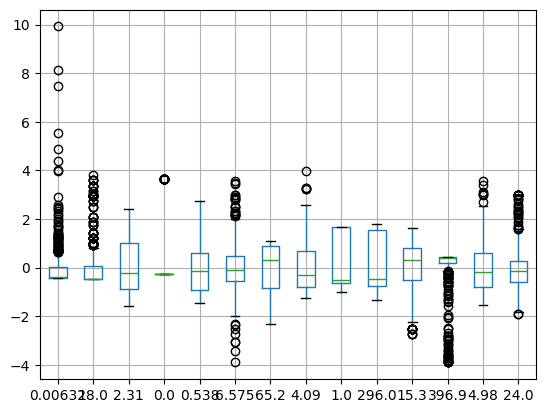

In [9]:
df_s.boxplot()

### Min max scaling

In [11]:
# khai báo phương pháp
minmax_scaler = MinMaxScaler()

# áp phong pháp vão tâp dû liêu
df_m = minmax_scaler.fit_transform(boston_df)

# đưa lại về dạng bảng 
# chỉ định tên cột
df_m = pd.DataFrame(df_m, columns=colnames)
df_m

,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000
0,0.000205,0.0,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
1,0.000205,0.0,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
2,0.000262,0.0,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
3,0.000674,0.0,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
4,0.000234,0.0,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,0.648936,0.992990,0.096026,0.526667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.000602,0.0,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
501,0.000407,0.0,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
502,0.000581,0.0,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
503,0.001130,0.0,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


<Axes: >

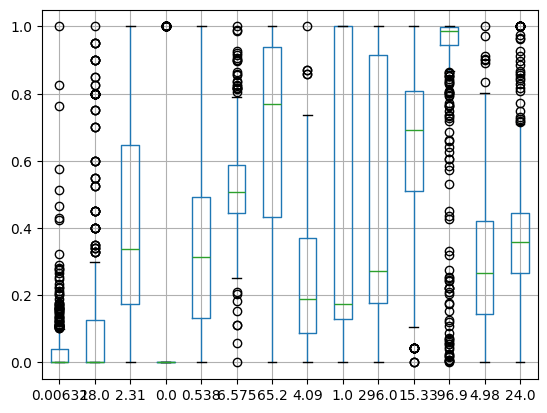

In [12]:
df_m.boxplot()

### Robust scaling

In [13]:
# khai báo phương pháp
r_scaler = RobustScaler()

# áp phương pháp vào tập dữ liệu
df_r = r_scaler.fit_transform(boston_df)

# đưa lại về dạng bảng 
df_r = pd.DataFrame(df_r, columns=colnames)
df_r

,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000
0,-0.064471,0.0,-0.202943,0.0,-0.394286,0.287838,0.024440,0.568110,-0.15,-0.227390,-0.464286,0.261973,-0.225126,0.0500
1,-0.064477,0.0,-0.202943,0.0,-0.394286,1.320270,-0.338086,0.568110,-0.15,-0.227390,-0.464286,0.067050,-0.738693,1.6875
2,-0.063064,0.0,-0.581720,0.0,-0.457143,1.067568,-0.649695,0.920017,-0.10,-0.279070,-0.142857,0.153257,-0.848241,1.5250
3,-0.052864,0.0,-0.581720,0.0,-0.457143,1.268919,-0.478615,0.920017,-0.10,-0.279070,-0.142857,0.261973,-0.608040,1.8750
4,-0.063765,0.0,-0.581720,0.0,-0.457143,0.300000,-0.386965,0.920017,-0.10,-0.279070,-0.142857,0.128831,-0.620101,0.9375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-0.054649,0.0,0.173509,0.0,0.200000,0.520270,-0.175153,-0.231563,-0.20,-0.147287,0.678571,0.026820,-0.171859,0.1500
501,-0.059477,0.0,0.173509,0.0,0.200000,-0.118919,-0.020367,-0.292972,-0.20,-0.147287,0.678571,0.261973,-0.231156,-0.0750
502,-0.055169,0.0,0.173509,0.0,0.200000,1.037838,0.270876,-0.331534,-0.20,-0.147287,0.678571,0.261973,-0.576884,0.3375
503,-0.041591,0.0,0.173509,0.0,0.200000,0.791892,0.236253,-0.260388,-0.20,-0.147287,0.678571,0.096743,-0.492462,0.1000


<Axes: >

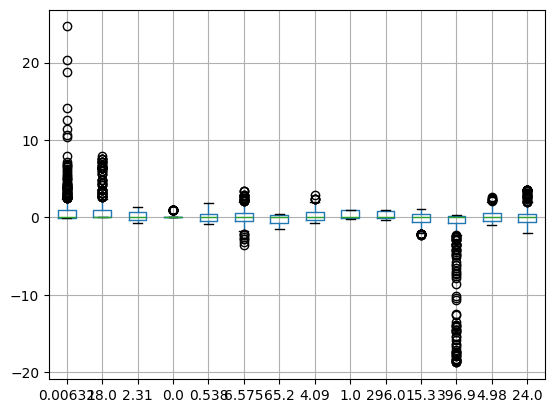

In [14]:
df_r.boxplot()

In [ ]:
# Thao tác dữ liệu
# Làm sạch dữ liệu
# CÁC PHƯƠNG PHÁP XỬ LÝ DỮ LIỆU
# BÀI TẬP VỀ NHÀ: THÚ 3 -> DEADLINE: THỨ 3 TUẦN SAU - BÀI TẬP CỦA TIỀN XỬ LÝ DỮ LIỆU 1.
# dinhthuytien2112@gmail.com